## Music Recommender System using K-Means Clustering

### 1. Import Libraries

In [43]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Load and Prepare Data

In [44]:
df = pd.read_csv('D:\ML\Project\MRS\DATA\songs_normalize.csv')  

print(f"Data loaded with shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Data loaded with shape: (2000, 18)

First 5 rows:


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [45]:
df = df.drop_duplicates()
df = df.dropna()
print(df.shape)

(1941, 18)


In [46]:
print("Columns DataFrame:")
print(df.columns.tolist())

song_name_col = 'song' 
artist_name_col = 'artist' 

print(f"\nUsing '{song_name_col}' for song names and '{artist_name_col}' for artist names")

Columns DataFrame:
['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre']

Using 'song' for song names and 'artist' for artist names


#### Converting Boolean 'explicit' column into Integer type

In [47]:
df["explicit"] = df["explicit"].astype(int)
df.head(3)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,"pop, country"


#### Correlation Matrix

In [48]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
num = num.drop(columns="year")
corr_matrix = num.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.119608,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762
explicit,0.119608,1.000000,0.047308,0.243799,-0.164212,0.001795,-0.091265,0.050653,0.415445,-0.028032,-0.082605,0.008238,-0.045397,0.014650
popularity,0.048140,0.047308,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057
danceability,-0.060083,0.243799,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074
energy,-0.082982,-0.164212,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305
key,-0.001353,0.001795,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852
loudness,-0.086226,-0.091265,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655
mode,-0.004095,0.050653,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445
speechiness,0.062538,0.415445,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192
acousticness,0.009960,-0.028032,0.022501,-0.062374,-0.447056,0.000719,-0.312079,0.009210,0.002926,1.000000,-0.003220,-0.107766,-0.126129,-0.105533


#### Heat Map

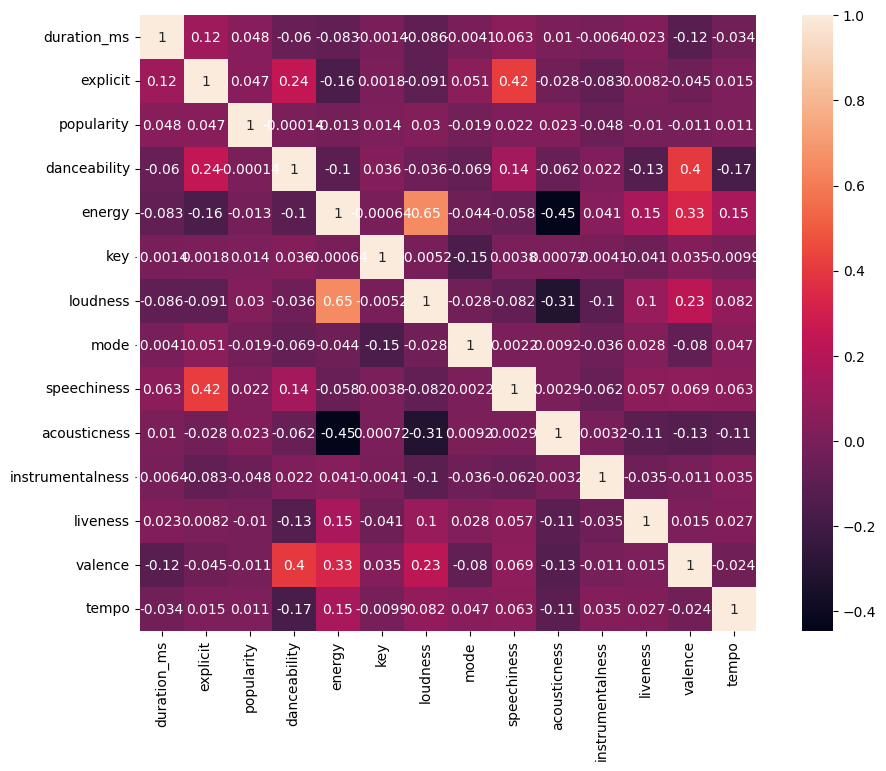

In [49]:
import seaborn as sb
visual_data = df.drop(columns=['song', 'artist', 'year', 'genre'])

plt.subplots(figsize=(12, 8))
sb.heatmap(visual_data.corr(), annot=True, square=True)
plt.show()

#### Encoding 'genre' column

In [50]:
unique_genres = set()

for genre_list in df["genre"]:
    genres = [g.strip() for g in genre_list.split(",")]
    unique_genres.update(genres)

unique_genres = sorted(unique_genres)
genre_to_indx = {genre: idx for idx, genre in enumerate(unique_genres)}

encoded_genres = []
for genre_list in df["genre"]:
    genres = [g.strip() for g in genre_list.split(",")]
    one_hot = [0] * len(unique_genres)
    for genre in genres:
        one_hot[genre_to_indx[genre]] = 1
    encoded_genres.append(one_hot)
encoded_df = pd.DataFrame(encoded_genres, columns=unique_genres)
df_encoded = pd.concat([df.drop(columns="genre"), encoded_df], axis = 1)
df = df_encoded.drop(columns="set()")
df_main = df
df.dropna()
df = df.drop_duplicates()
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock
0,Britney Spears,Oops!...I Did It Again,211160.0,0.0,2000.0,77.0,0.751,0.834,1.0,-5.444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,blink-182,All The Small Things,167066.0,0.0,1999.0,79.0,0.434,0.897,0.0,-4.918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Faith Hill,Breathe,250546.0,0.0,1999.0,66.0,0.529,0.496,7.0,-9.007,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Bon Jovi,It's My Life,224493.0,0.0,2000.0,78.0,0.551,0.913,0.0,-4.063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,*NSYNC,Bye Bye Bye,200560.0,0.0,2000.0,65.0,0.614,0.928,8.0,-4.806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(1883, 31)

#### Normalizing Numerical data

In [52]:
def normalize_column(col):
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [53]:
for col in num.columns:
    if col != 'year':
        normalize_column(col)

display(df.head())
print(df.shape)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock
0,Britney Spears,Oops!...I Did It Again,0.264478,0.0,2000.0,0.865169,0.735225,0.825230,0.090909,0.744639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,blink-182,All The Small Things,0.145673,0.0,1999.0,0.887640,0.360520,0.891961,0.000000,0.770630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Faith Hill,Breathe,0.370598,0.0,1999.0,0.741573,0.472813,0.467217,0.636364,0.568584,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Bon Jovi,It's My Life,0.300402,0.0,2000.0,0.876404,0.498818,0.908908,0.000000,0.812877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,*NSYNC,Bye Bye Bye,0.235918,0.0,2000.0,0.730337,0.573286,0.924796,0.727273,0.776164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(1883, 31)


#### Boxplot Visualization

In [54]:
numerical_features = [col for col in num.columns if col != 'year']
genre_columns = [col for col in df.columns if col not in numerical_features and col !=  'year' and col != 'artist' and col != 'song']

<Axes: >

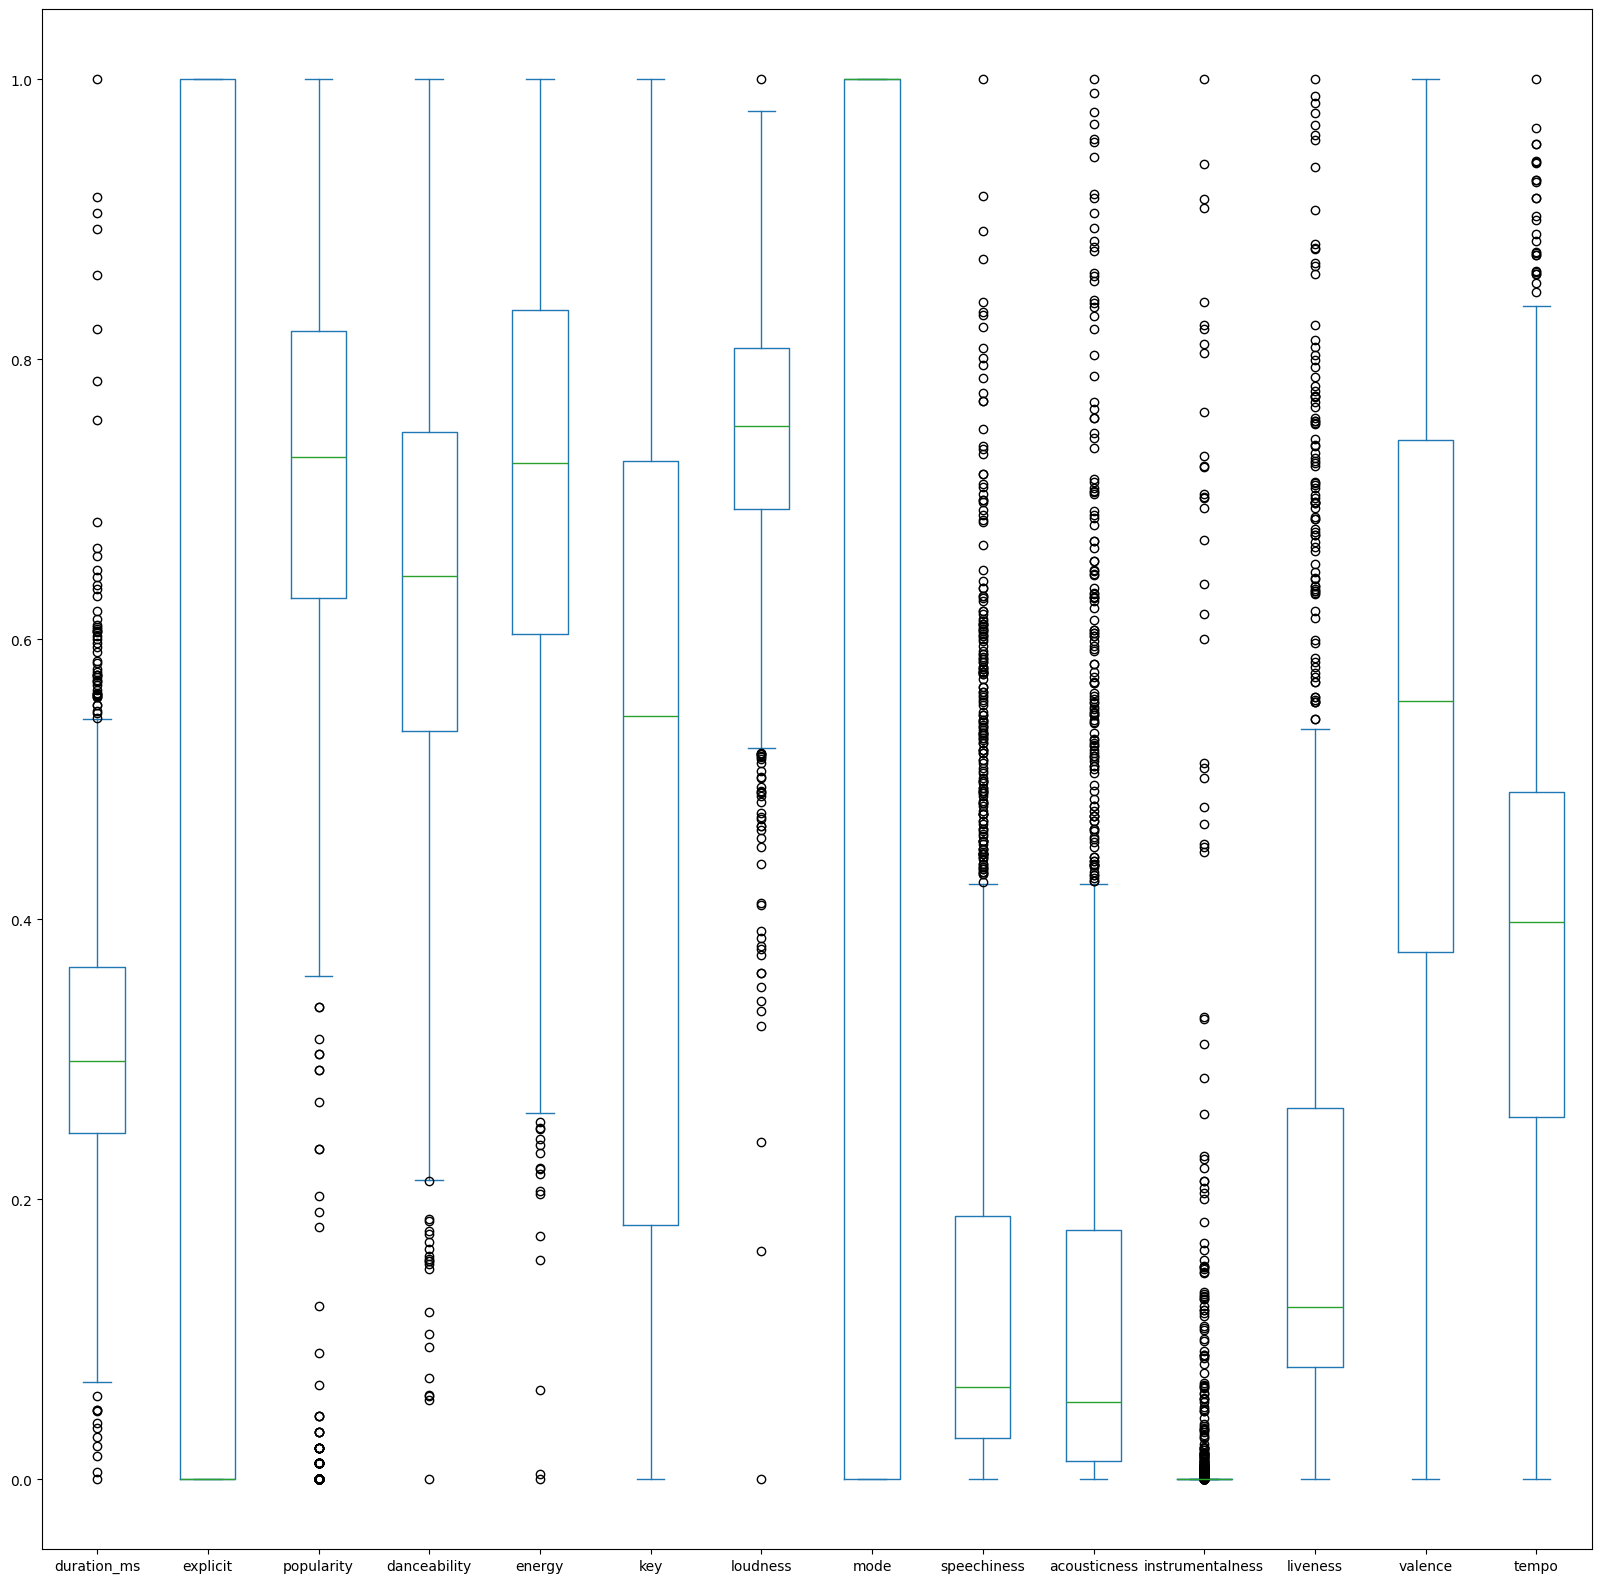

In [55]:
df.select_dtypes(np.number).drop(columns = genre_columns + ['year']).plot(kind='box' ,figsize=(20, 20) ,fontsize=10)

#### Scatterplot Visualization

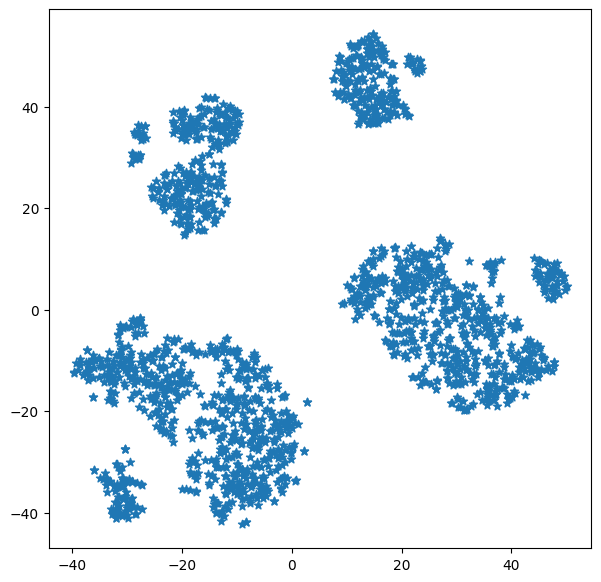

In [56]:
from sklearn.manifold import TSNE

model = TSNE(n_components = 2, random_state = 0)
music_data_modified = df.select_dtypes(np.number).drop(columns=['year'] + genre_columns)
tsne_data = model.fit_transform(music_data_modified)

plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  marker= '*')
plt.show()

### 3. Feature Selection and Clustering

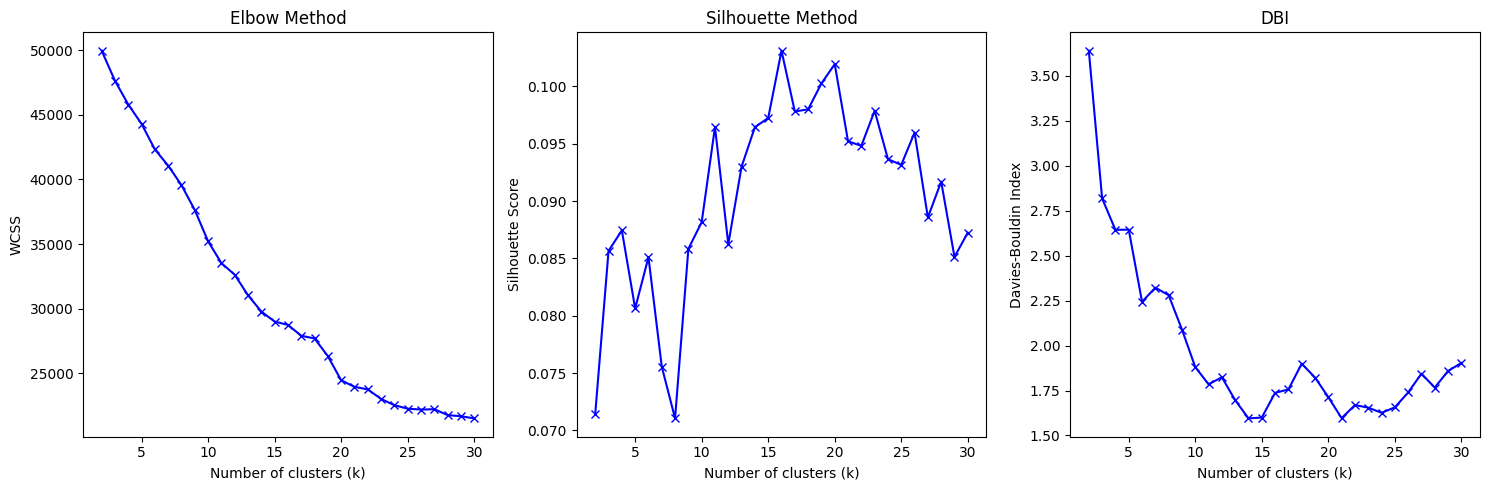

Suggested k from Elbow Method: 9
Suggested k from Silhouette Score: 16
Suggested k from Davies-Bouldin Index: 14


In [57]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

feature_columns = [col for col in num.columns if col != 'year' and col != 'acousticness' and col != 'instrumentalness']
feature_columns = numerical_features + genre_columns
X = df[feature_columns]
df = df.drop_duplicates()
df = df.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def find_optimal_k(X_scaled, max_k=30):
    wcss = []  
    silhouette_scores = []
    dbi_scores = []
    k_values = range(2, max_k+1) 
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X_scaled)
        labels = kmeans.labels_
        
        wcss.append(kmeans.inertia_)
        if k >= 2:
            silhouette_scores.append(silhouette_score(X_scaled, labels))
            dbi_scores.append(davies_bouldin_score(X_scaled, labels))
    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(k_values, wcss, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')

    plt.subplot(1, 3, 2)
    plt.plot(k_values, silhouette_scores, 'bx-')  
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')

    plt.subplot(1, 3, 3)
    plt.plot(k_values, dbi_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('DBI')
    
    plt.tight_layout()
    plt.show()

    optimal_k_elbow = np.argmin(np.diff(wcss)) + 2  
    optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
    optimal_k_dbi = k_values[np.argmin(dbi_scores)]  
    
    print(f"Suggested k from Elbow Method: {optimal_k_elbow}")
    print(f"Suggested k from Silhouette Score: {optimal_k_silhouette}")
    print(f"Suggested k from Davies-Bouldin Index: {optimal_k_dbi}")
    
    return optimal_k_elbow, optimal_k_silhouette, optimal_k_dbi

optimal_k1, optimal_k2, optimal_k3 = find_optimal_k(X_scaled)


## 4. Recommendation Function

In [ ]:
def recommend_songs(song_name, artist_name=None, n_recommendations=5):
    try:
        if artist_name:
            song_idx = df[(df[song_name_col] == song_name) & 
                         (df[artist_name_col] == artist_name)].index[0]
        else:
            song_idx = df[df[song_name_col] == song_name].index[0]
        
        input_cluster = df.loc[song_idx, 'cluster']
        cluster_songs = df[df['cluster'] == input_cluster].copy()
        
        input_features = cluster_pipeline['scaler'].transform(X.loc[song_idx:song_idx])
        cluster_features = cluster_pipeline['scaler'].transform(X.loc[cluster_songs.index])
        
        cluster_songs['similarity'] = cosine_similarity(input_features, cluster_features)[0]
        
        recommendations = (
            cluster_songs.sort_values('similarity', ascending=False)
            .drop(song_idx, errors='ignore')
            .head(n_recommendations)
        )
        
        return recommendations[[song_name_col, artist_name_col, 'similarity'] + feature_columns]
    
    except IndexError:
        return "Song not found in database. Please check the spelling."
    except Exception as e:
        return f"An error occurred: {str(e)}"

In [59]:
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters = 10, random_state=42, n_init='auto'))
])

cluster_pipeline.fit(X)
df['cluster'] = cluster_pipeline.predict(X)


print("\nFinal cluster distribution:")
print(df['cluster'].value_counts().sort_index())


Final cluster distribution:
cluster
0    359
1    493
2     62
3    434
4      4
5     20
6    174
7    315
8     20
9      2
Name: count, dtype: int64


### Evaluating Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = df.select_dtypes(np.number).drop(columns = ['year']).copy()
y = df['cluster']

In [61]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1506, 29)
(1506,)
(188, 29)
(188,)
(189, 29)
(189,)


(None, None)

In [62]:
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=optimal_k1)
knn2= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=optimal_k2)
knn3= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=optimal_k3)

In [63]:
knn2.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)

knn2.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn3.fit(X_valid, y_valid)

knn2.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)

y_pred_2 = knn2.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_3 = knn3.predict(X_valid)

In [64]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=Silhouette Method: ", accuracy_score(y_valid, y_pred_2)*100)
print("Accuracy with k=Elbow Method", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k= DBI method: ", accuracy_score(y_valid, y_pred_3)*100)

Accuracy with k=Silhouette Method:  93.61702127659575
Accuracy with k=Elbow Method 94.68085106382979
Accuracy with k= DBI method:  93.61702127659575


In [65]:
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters = optimal_k1, random_state=42, n_init='auto'))
])

cluster_pipeline.fit(X)
df['cluster'] = cluster_pipeline.predict(X)


print("\nFinal cluster distribution:")
print(df['cluster'].value_counts().sort_index())


Final cluster distribution:
cluster
0    348
1    175
2    317
3    298
4     62
5    658
6     20
7      1
8      4
Name: count, dtype: int64


### 5. Example Usage

In [66]:
test_song = df.sample(1).iloc[0] 
print(f"Recommendations for: {test_song[song_name_col]} by {test_song[artist_name_col]}\n")
recommendations = recommend_songs(test_song[song_name_col], test_song[artist_name_col])
display(recommendations)

Recommendations for: Wrecking Ball by Miley Cyrus



,song,artist,similarity,duration_ms,explicit,popularity,danceability,energy,key,loudness,...,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock
1405,Stay With Me,Sam Smith,0.890746,0.160915,0.0,0.898876,0.341608,0.386718,0.000000,0.695227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1408,All of Me,John Legend,0.888514,0.421829,0.0,0.943820,0.346336,0.221481,0.727273,0.664591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1474,Night Changes,One Direction,0.842738,0.306079,0.0,0.932584,0.641844,0.492638,0.727273,0.630843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1819,lovely (with Khalid),Billie Eilish,0.828795,0.234908,0.0,0.966292,0.262411,0.255375,0.363636,0.514132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1712,Bored,Billie Eilish,0.815565,0.183036,0.0,0.943820,0.573286,0.278678,0.636364,0.386352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Evaluating Recommendations

In [67]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X_scaled, df['cluster'])
print(f"Davies-Bouldin Index: {dbi:.3f}")

Davies-Bouldin Index: 1.841


In [68]:
def evaluate_recommendations(song_name, artist_name=None, n_recommendations=5):
    recs = recommend_songs(song_name, artist_name, n_recommendations)

    if isinstance(recs, str):
        print(recs)
        return

    try:
        if artist_name:
            input_song = df[(df['song'] == song_name) & 
                          (df['artist'] == artist_name)].iloc[0]
        else:
            input_song = df[df['song'] == song_name].iloc[0]
    except IndexError:
        print("Song not found in database.")
        return
    plt.figure(figsize=(10, 6))
    

    features_to_compare = numerical_features
    
    normalized_tempo = (input_song['tempo'] - df['tempo'].min()) / (df['tempo'].max() - df['tempo'].min())
    avg_rec_tempo = (recs['tempo'].mean() - df['tempo'].min()) / (df['tempo'].max() - df['tempo'].min())
    
    input_features = input_song[features_to_compare[:-1]].tolist() + [normalized_tempo]
    avg_rec_features = recs[features_to_compare[:-1]].mean().tolist() + [avg_rec_tempo]

    x = range(len(features_to_compare))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], input_features, width, label='Input Song', color='blue')
    plt.bar([i + width/2 for i in x], avg_rec_features, width, label='Avg Recommendations', color='orange')
    
    plt.title('Feature Comparison: Input Song vs Recommendations')
    plt.xticks(x, [f[:5] for f in features_to_compare])
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nInput song: {input_song['song']} by {input_song['artist']}")
    print(f"Average similarity score: {recs['similarity'].mean():.2f}")
    print("\nTop recommendations:")
    print(recs[['song', 'artist', 'similarity']].to_string(index=False))

Testing with: Can't Hold Us (feat. Ray Dalton) by Macklemore & Ryan Lewis



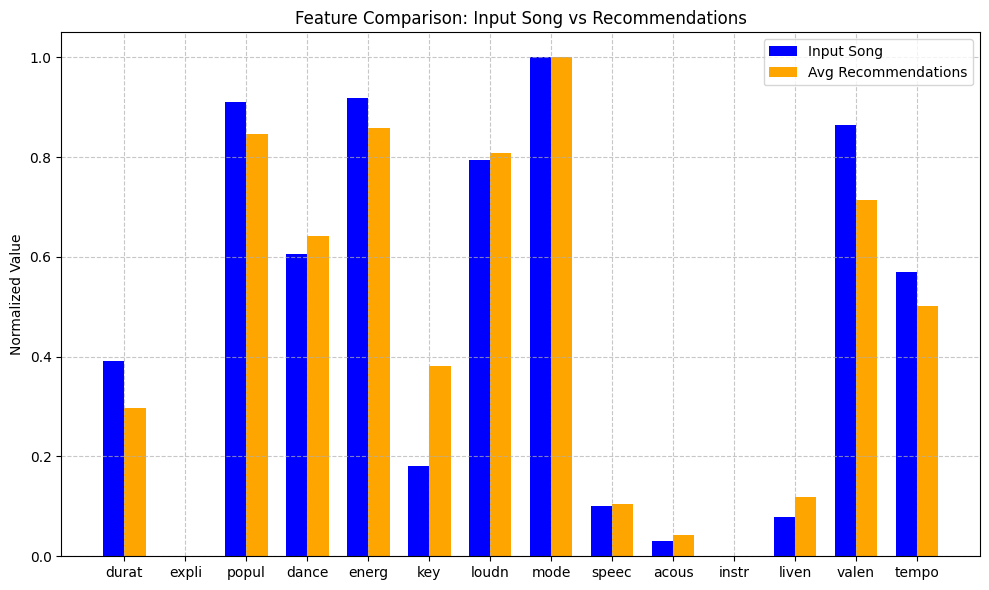


Input song: Can't Hold Us (feat. Ray Dalton) by Macklemore & Ryan Lewis
Average similarity score: 0.85

Top recommendations:
                   song        artist  similarity
         Still into You      Paramore    0.918489
      Beauty And A Beat Justin Bieber    0.865555
Supermassive Black Hole          Muse    0.844209
             Poker Face     Lady Gaga    0.837224
              Price Tag      Jessie J    0.786523


In [69]:
test_song = df.sample(1).iloc[0] 
print(f"Testing with: {test_song[song_name_col]} by {test_song[artist_name_col]}\n")
evaluate_recommendations(test_song[song_name_col])